<a href="https://colab.research.google.com/github/danielleitesoares/tccuea/blob/main/2019_trim04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Universidade do Estado do Amazonas</center>
##### <center>Pós-graduação Lato Sensu em Ciência de Dados</center>

<center>

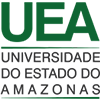

</center>

---

## <center>Código fonte do TCC: Análise dos dados 4º Trimestre de 2019</center>
##### <center>**Oriemtadora:** Msc. Alice Adativa</center>
###### <center>**Aluno:** Daniel Erasmo Leite Soares</center>



---



## <center>Fonte de dados.</center>

[DB Queimadas do INPE.](https://queimadas.dgi.inpe.br/queimadas/bdqueimadas)


## **Preparação do Ambiente**

---



In [1]:
# Pacotes instalados
!pip install geopandas
!pip install contextily
!pip install biokit
!pip install plotly

     |████████████████████████████████| 1.0 MB 4.8 MB/s 
     |████████████████████████████████| 16.7 MB 281 kB/s 
     |████████████████████████████████| 6.3 MB 39.8 MB/s 
     |████████████████████████████████| 19.3 MB 1.4 MB/s 
     |████████████████████████████████| 162 kB 5.0 MB/s 
     |████████████████████████████████| 47 kB 4.3 MB/s 
     |████████████████████████████████| 1.0 MB 55.2 MB/s 
     |████████████████████████████████| 2.3 MB 40.9 MB/s 
     |████████████████████████████████| 51 kB 222 kB/s 
     |████████████████████████████████| 47 kB 3.9 MB/s 
     |████████████████████████████████| 144 kB 41.8 MB/s 
     |████████████████████████████████| 5.8 MB 34.2 MB/s 
     |████████████████████████████████| 251 kB 47.8 MB/s 
     |████████████████████████████████| 127 kB 55.1 MB/s 
  Created wheel for biokit: filename=biokit-0.5.0-py3-none-any.whl size=177148 sha256=4d389f5db6b675e352633be64083787fce647f67fb3d3fd20c46b182a2d73203
  Stored in directory: /root/.cache/pip/wheel

In [2]:
## Bibliotecas de Tratamento de Dados
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import contextily
import numpy as np

## Bibliotecas Gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

## Bibliotecas de ML
from sklearn.cluster import KMeans

## **Carregamento e preparação do DataFrame de todos os Biomas**

---



In [3]:
# Montando a pasta do Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Criando os DataFrames de alertas de focos de queimadas do Brasil
alertas = pd.read_csv('/content/drive/MyDrive/TCC/dataset/meses_focos_biomas_2019-01-01_2019-12-31.csv')

## **Preparação do DataFrame somente do Bioma Amazônia**

---



In [5]:
alertas_amazonia = alertas[alertas['bioma'] == 'Amazonia']

## **Preparação do DataFrame com dados do 4º trimestre 2019**

---



In [6]:
alertas_m10 = alertas_amazonia[alertas_amazonia['mes'] == 10]
alertas_m11 = alertas_amazonia[alertas_amazonia['mes'] == 11]
alertas_m12 = alertas_amazonia[alertas_amazonia['mes'] == 12]

alertas_todos = [alertas_m10, alertas_m11, alertas_m12]
alertas_trim04 = pd.concat(alertas_todos)

In [7]:
alertas_trim04

,mes,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,10,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,PACAJA,Amazonia,2,1.6,0.5,-3.602,-49.963,201.6
1,10,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0,0.5,0.2,-3.630,-52.255,47.5
2,10,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0,0.5,0.2,-3.631,-52.264,17.4
3,10,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0,0.5,0.2,-3.642,-52.265,12.4
4,10,2019/10/27 17:05:00,AQUA_M-T,Brasil,AMAZONAS,NOVA OLINDA DO NORTE,Amazonia,0,0.3,0.0,-3.651,-58.254,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195308,12,2019/12/24 17:40:00,AQUA_M-T,Brasil,MATO GROSSO,FIGUEIROPOLIS D'OESTE,Amazonia,1,0.7,0.6,-15.601,-58.693,9.3
195309,12,2019/12/24 17:40:00,AQUA_M-T,Brasil,MATO GROSSO,PORTO ESPERIDIAO,Amazonia,1,0.6,0.5,-15.681,-58.808,13.4
195310,12,2019/12/24 17:40:00,AQUA_M-T,Brasil,MATO GROSSO,COTRIGUACU,Amazonia,0,0.8,0.0,-9.374,-58.956,27.2
195311,12,2019/12/24 17:40:00,AQUA_M-T,Brasil,MATO GROSSO,RONDOLANDIA,Amazonia,1,11.0,0.0,-9.887,-60.793,9.8


## **Criação o GeoDataFrame e Sistema de Referência de Coordenadas**

In [8]:
geometry = [Point(xy) for xy in zip(alertas_trim04['longitude'], alertas_trim04['latitude'])]

In [9]:
alertas_trim04 = gpd.GeoDataFrame(alertas_trim04, crs='EPSG:4326', geometry=geometry)

In [10]:
type(alertas_trim04)

geopandas.geodataframe.GeoDataFrame

In [11]:
alertas_trim04

,mes,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry
0,10,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,PACAJA,Amazonia,2,1.6,0.5,-3.602,-49.963,201.6,POINT (-49.96300 -3.60200)
1,10,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0,0.5,0.2,-3.630,-52.255,47.5,POINT (-52.25500 -3.63000)
2,10,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0,0.5,0.2,-3.631,-52.264,17.4,POINT (-52.26400 -3.63100)
3,10,2019/10/27 17:05:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,0,0.5,0.2,-3.642,-52.265,12.4,POINT (-52.26500 -3.64200)
4,10,2019/10/27 17:05:00,AQUA_M-T,Brasil,AMAZONAS,NOVA OLINDA DO NORTE,Amazonia,0,0.3,0.0,-3.651,-58.254,12.1,POINT (-58.25400 -3.65100)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195308,12,2019/12/24 17:40:00,AQUA_M-T,Brasil,MATO GROSSO,FIGUEIROPOLIS D'OESTE,Amazonia,1,0.7,0.6,-15.601,-58.693,9.3,POINT (-58.69300 -15.60100)
195309,12,2019/12/24 17:40:00,AQUA_M-T,Brasil,MATO GROSSO,PORTO ESPERIDIAO,Amazonia,1,0.6,0.5,-15.681,-58.808,13.4,POINT (-58.80800 -15.68100)
195310,12,2019/12/24 17:40:00,AQUA_M-T,Brasil,MATO GROSSO,COTRIGUACU,Amazonia,0,0.8,0.0,-9.374,-58.956,27.2,POINT (-58.95600 -9.37400)
195311,12,2019/12/24 17:40:00,AQUA_M-T,Brasil,MATO GROSSO,RONDOLANDIA,Amazonia,1,11.0,0.0,-9.887,-60.793,9.8,POINT (-60.79300 -9.88700)


In [12]:
alertas_trim04 = alertas_trim04.to_crs(crs='EPSG:3857')

In [13]:
alertas_trim04.crs.to_string()

'EPSG:3857'

## **Geração dos gráficos de quantitativos e localização dos focos por Estado**

In [14]:
alertas_trim04['estado'].unique()

array(['PARA', 'AMAZONAS', 'MATO GROSSO', 'RONDONIA', 'TOCANTINS',
       'MARANHAO', 'AMAPA', 'ACRE', 'RORAIMA'], dtype=object)

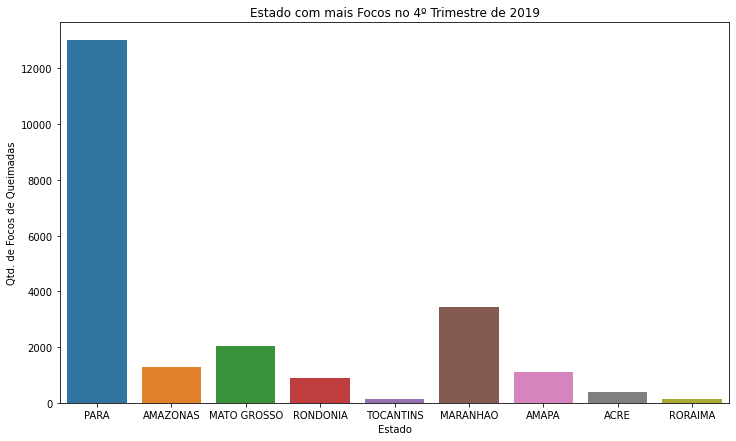

In [15]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x='estado', data=alertas_trim04)
ax.set_title("Estado com mais Focos no 4º Trimestre de 2019")
ax.set_xlabel('Estado')
ax.set_ylabel('Qtd. de Focos de Queimadas')
plt.show()

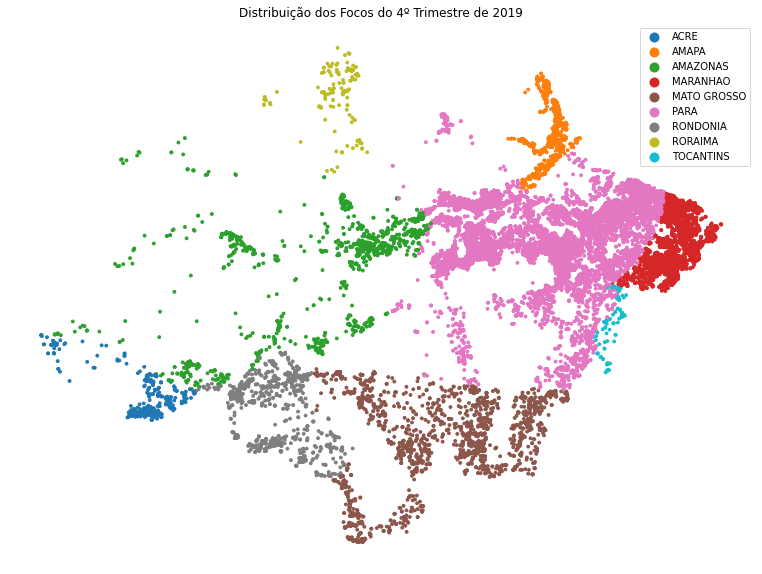

In [27]:
ax = alertas_trim04.plot(figsize=(15, 10), column='estado', markersize=8, legend=True)
#contextily.add_basemap(ax)
ax.set_axis_off()
ax.set_title("Distribuição dos Focos do 4º Trimestre de 2019")
plt.show()

## **Aplicação dos Algoritmo K-Means**



*   K-Means

**K-Means Para o Bioma Amazônia**

In [17]:
coord_amazonia = alertas_trim04.drop(columns=["datahora","satelite","pais","estado","municipio","bioma","diasemchuva","precipitacao","riscofogo","frp","geometry"])

In [18]:
coord_amazonia

,mes,latitude,longitude
0,10,-3.602,-49.963
1,10,-3.630,-52.255
2,10,-3.631,-52.264
3,10,-3.642,-52.265
4,10,-3.651,-58.254
...,...,...,...
195308,12,-15.601,-58.693
195309,12,-15.681,-58.808
195310,12,-9.374,-58.956
195311,12,-9.887,-60.793


In [19]:
agrupadorK = KMeans(n_clusters=9)

In [20]:
agrupadorK.fit(coord_amazonia)

KMeans(n_clusters=9)

In [21]:
np.unique(agrupadorK.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [22]:
coord_amazonia['Grupo'] = agrupadorK.labels_

In [23]:
coord_amazonia

,mes,latitude,longitude,Grupo
0,10,-3.602,-49.963,0
1,10,-3.630,-52.255,0
2,10,-3.631,-52.264,0
3,10,-3.642,-52.265,0
4,10,-3.651,-58.254,6
...,...,...,...,...
195308,12,-15.601,-58.693,1
195309,12,-15.681,-58.808,1
195310,12,-9.374,-58.956,1
195311,12,-9.887,-60.793,1


**Gráfico com agrupamento por Cluster**

In [24]:
from seaborn.utils import locator_to_legend_entries
c0lat = coord_amazonia[coord_amazonia['Grupo']==0]['latitude']
c0lon = coord_amazonia[coord_amazonia['Grupo']==0]['longitude']
c1lat = coord_amazonia[coord_amazonia['Grupo']==1]['latitude']
c1lon = coord_amazonia[coord_amazonia['Grupo']==1]['longitude']
c2lat = coord_amazonia[coord_amazonia['Grupo']==2]['latitude']
c2lon = coord_amazonia[coord_amazonia['Grupo']==2]['longitude']
c3lat = coord_amazonia[coord_amazonia['Grupo']==3]['latitude']
c3lon = coord_amazonia[coord_amazonia['Grupo']==3]['longitude']
c4lat = coord_amazonia[coord_amazonia['Grupo']==4]['latitude']
c4lon = coord_amazonia[coord_amazonia['Grupo']==4]['longitude']
c5lat = coord_amazonia[coord_amazonia['Grupo']==5]['latitude']
c5lon = coord_amazonia[coord_amazonia['Grupo']==5]['longitude']
c6lat = coord_amazonia[coord_amazonia['Grupo']==6]['latitude']
c6lon = coord_amazonia[coord_amazonia['Grupo']==6]['longitude']
c7lat = coord_amazonia[coord_amazonia['Grupo']==7]['latitude']
c7lon = coord_amazonia[coord_amazonia['Grupo']==7]['longitude']
c8lat = coord_amazonia[coord_amazonia['Grupo']==8]['latitude']
c8lon = coord_amazonia[coord_amazonia['Grupo']==8]['longitude']

x0 = c0lat 
y0 = c0lon
x1 = c1lat
y1 = c1lon
x2 = c2lat
y2 = c2lon
x3 = c3lat
y3 = c3lon
x4 = c4lat
y4 = c4lon
x5 = c5lat
y5 = c5lon
x6 = c6lat
y6 = c6lon
x7 = c7lat
y7 = c7lon
x8 = c8lat
y8 = c8lon

# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(
        x=x0,
        y=y0,
        mode="markers",
        marker=dict(color="paleturquoise")
    )
)

fig.add_trace(
    go.Scatter(
        x=x1,
        y=y1,
        mode="markers",
        marker=dict(color="limegreen")
    )
)

fig.add_trace(
    go.Scatter(
        x=x2,
        y=y2,
        mode="markers",
        marker=dict(color="tomato")
    )
)

fig.add_trace(
    go.Scatter(
        x=x3,
        y=y3,
        mode="markers",
        marker=dict(color="dodgerblue")
    )
)

fig.add_trace(
    go.Scatter(
        x=x4,
        y=y4,
        mode="markers",
        marker=dict(color="rebeccapurple")
    )
)

fig.add_trace(
    go.Scatter(
        x=x5,
        y=y5,
        mode="markers",
        marker=dict(color="yellow")
    )
)

fig.add_trace(
    go.Scatter(
        x=x6,
        y=y6,
        mode="markers",
        marker=dict(color="chartreuse")
    )
)

fig.add_trace(
    go.Scatter(
        x=x7,
        y=y7,
        mode="markers",
        marker=dict(color="chocolate")
    )
)

fig.add_trace(
    go.Scatter(
        x=x8,
        y=y8,
        mode="markers",
        marker=dict(color="red")
    )
)


# Add buttons that add shapes
cluster0 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x0), y0=min(y0),
                            x1=max(x0), y1=max(y0),
                            line=dict(color="paleturquoise"))]
cluster1 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x1), y0=min(y1),
                            x1=max(x1), y1=max(y1),
                            line=dict(color="limegreen"))]
cluster2 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x2), y0=min(y2),
                            x1=max(x2), y1=max(y2),
                            line=dict(color="tomato"))]
cluster3 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x3), y0=min(y3),
                            x1=max(x3), y1=max(y3),
                            line=dict(color="dodgerblue"))]
cluster4 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x4), y0=min(y4),
                            x1=max(x4), y1=max(y4),
                            line=dict(color="rebeccapurple"))]
cluster5 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x5), y0=min(y5),
                            x1=max(x5), y1=max(y5),
                            line=dict(color="yellow"))]
cluster6 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x6), y0=min(y6),
                            x1=max(x6), y1=max(y6),
                            line=dict(color="chartreuse"))]
cluster7 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x7), y0=min(y7),
                            x1=max(x7), y1=max(y7),
                            line=dict(color="chocolate"))]
cluster8 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x8), y0=min(y8),
                            x1=max(x8), y1=max(y8),
                            line=dict(color="red"))]
fig.update_layout(
    updatemenus=[
        dict(buttons=list([
            dict(label="None",
                 method="relayout",
                 args=["shapes", []]),
            dict(label="Cluster 0",
                 method="relayout",
                 args=["shapes", cluster0]),
            dict(label="Cluster 1",
                 method="relayout",
                 args=["shapes", cluster1]),
            dict(label="Cluster 2",
                 method="relayout",
                 args=["shapes", cluster2]),
            dict(label="Cluster 3",
                 method="relayout",
                 args=["shapes", cluster3]),
            dict(label="Cluster 4",
                 method="relayout",
                 args=["shapes", cluster4]),
            dict(label="Cluster 5",
                 method="relayout",
                 args=["shapes", cluster5]),
            dict(label="Cluster 6",
                 method="relayout",
                 args=["shapes", cluster6]),
            dict(label="Cluster 7",
                 method="relayout",
                 args=["shapes", cluster7]),
            dict(label="Cluster 8",
                 method="relayout",
                 args=["shapes", cluster8]),
            dict(label="All",
                 method="relayout",
                 args=["shapes", cluster0 + cluster1 + cluster2 + cluster3 + cluster4 + cluster5 + cluster6 + cluster7 + cluster8])
        ]),
        )
    ]
)

# Update remaining layout properties
fig.update_layout(
    title_text="Clusters do 4º Trimestre de 2019",
    showlegend=False,
)
fig.show()
